DATOP - Date of flight
FLTID - Flight number
DEPSTN - Departure point
ARRSTN - Arrival point
STD - Scheduled Time departure
STA - Scheduled Time arrival
STATUS - Flight status


ETD - Expected Time departure
ETA - Expected Time arrival
ATD - Actual Time of Departure
ATA - Actual Time of arrival
DELAY1 - Delay code 1
DUR1 - delay time 1
DELAY2 - Delay code 2
DUR2 - delay time 2
DELAY3 - Delay code 3
DUR3 - delay time 3
DELAY4 - Delay code 4
DUR4 - delay time 4


AC - Aircraft Code
target - delays in min

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_train = pd.read_csv('../data/Train.csv')
df_train.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0


In [28]:
df_train['STA']= df_train['STA'].str.replace('.',':')
df_train['DATOP'] = pd.to_datetime(df_train['DATOP'])
df_train['STA'] = pd.to_datetime(df_train['STA'],format = '%Y-%m-%d %H:%M:%S')
df_train['STD'] = pd.to_datetime(df_train['STD'],format = '%Y-%m-%d %H:%M:%S')
df_train['month_DATOP'] = df_train['DATOP'].dt.month
df_train['year_DATOP'] = df_train['DATOP'].dt.year
df_train['weekdays_DATOP'] = df_train['DATOP'].dt.weekday

In [29]:
df_train['flight_duration_hrs']=(df_train['STA']-df_train['STD']).dt.total_seconds()/3600
df_train['flight_duration_category'] = df_train['flight_duration_hrs'].apply(lambda x: 'short' if x < 1.0 else ('medium' if 1.0 <= x < 2.0 else 'long'))

In [30]:
df_no_delay = df_train[df_train['target'] == 0]
df_delay = df_train[df_train['target'] > 0]

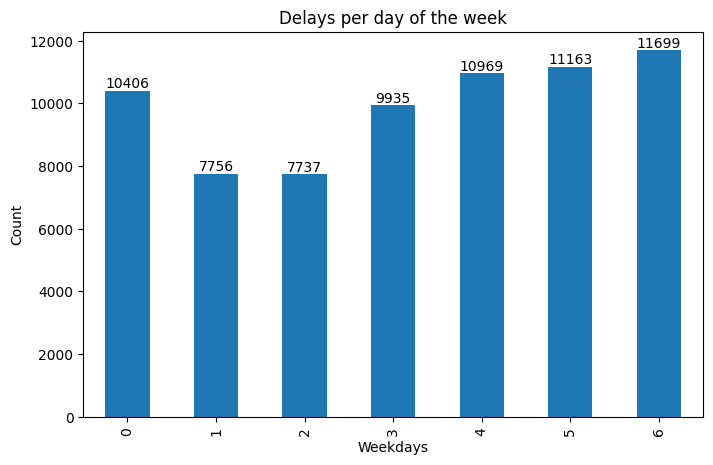

In [31]:
ax = df_delay.groupby('weekdays_DATOP').size().plot(kind='bar', figsize=(8,5))

for bar in ax.patches:
    ax.annotate(int(bar.get_height()),(bar.get_x() + bar.get_width()/2, bar.get_height()),ha='center',va='bottom')

plt.xlabel('Weekdays')
plt.ylabel('Count')
plt.title('Delays per day of the week')
plt.show()

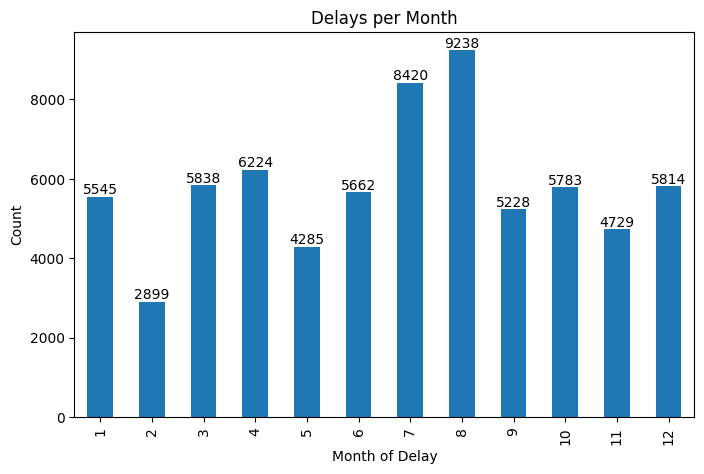

In [ ]:
ax = df_delay.groupby('month_DATOP').size().plot(kind='bar', figsize=(8,5))

for bar in ax.patches:
    ax.annotate(int(bar.get_height()),(bar.get_x() + bar.get_width()/2, bar.get_height()),ha='center',va='bottom')

plt.xlabel('Month of Delay')
plt.ylabel('Count')
plt.title('Delays per Month target > 0')
plt.show()


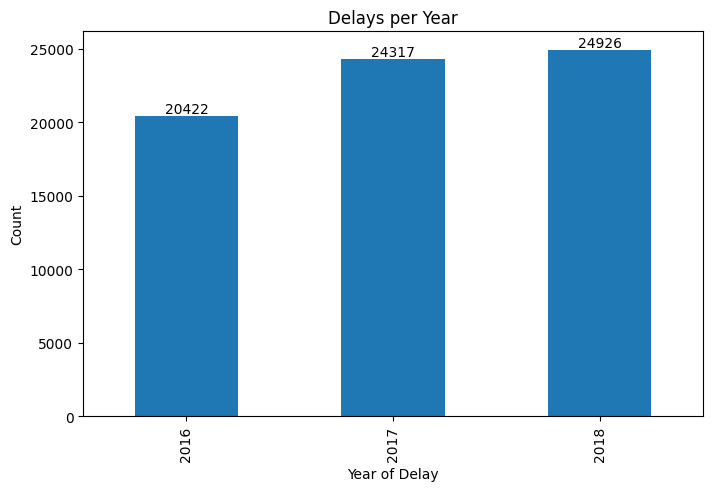

In [ ]:
ax = df_delay.groupby('year_DATOP').size().plot(kind='bar', figsize=(8,5))

for bar in ax.patches:
    ax.annotate(int(bar.get_height()),(bar.get_x() + bar.get_width()/2, bar.get_height()),ha='center',va='bottom')

plt.xlabel('Year of Delay')
plt.ylabel('Count')
plt.title('Delays per Year target > 0')
plt.show()


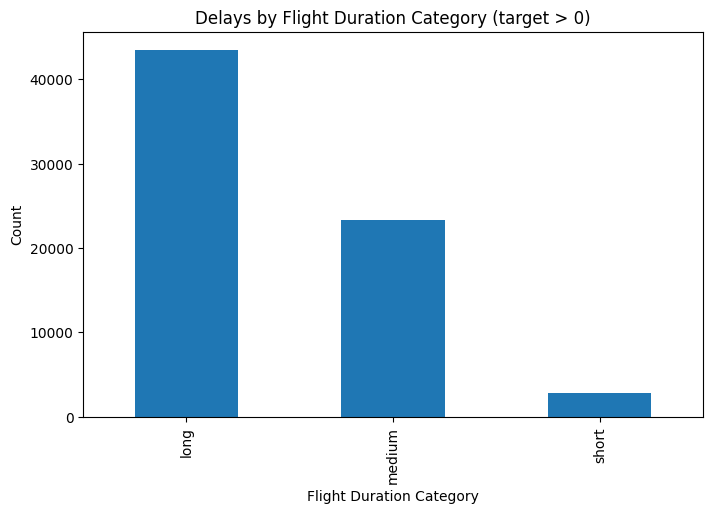

In [34]:
df_delay['flight_duration_category'].value_counts().plot(kind='bar', figsize=(8,5))
plt.xlabel('Flight Duration Category')
plt.ylabel('Count')
plt.title('Delays by Flight Duration Category (target > 0)')
plt.show()